In [1]:
import warnings
warnings.filterwarnings("ignore")
import paddle
from paddle import nn

In [4]:
net = nn.Sequential(nn.Flatten(),
                    nn.Linear(784, 256),
                    nn.ReLU(),
                    nn.Linear(256, 10))


for layer in net:
    if type(layer) == nn.Linear:
        weight_attr = paddle.framework.ParamAttr(initializer=paddle.nn.initializer.Normal(mean=0.0, std=0.01))
        layer.weight_attr = weight_attr

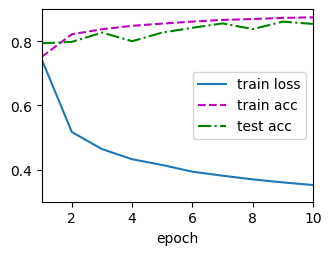

In [5]:
from LinerRegression.picCatTrainFromZeroUtils import train_ch3
from LinerRegression.picCatTrainSet import load_data_fashion_mnist

batch_size, lr, num_epochs = 256, 0.1, 10
loss = nn.CrossEntropyLoss(reduction='none')
trainer = paddle.optimizer.SGD(parameters=net.parameters(), learning_rate=lr)

train_iter, test_iter = load_data_fashion_mnist(batch_size)
train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)